# Linear Model - Health Insurance Dataset

- Author - Mrinal Kanti Saha
- Date - 10 August, 2022
- [Dataset](https://www.kaggle.com/datasets/shivadumnawar/health-insurance-dataset)

## 1. Importing the dataset from Kaggle



In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrinalkantisaha","key":"4ba32e60d57b583943a7ce5bbd560f69"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# downloading the zipped dataset
!kaggle datasets download -d shivadumnawar/health-insurance-dataset

  0% 0.00/16.1k [00:00<?, ?B/s]
100% 16.1k/16.1k [00:00<00:00, 13.0MB/s]


In [ ]:
# unzipping the dataset
!unzip health-insurance-dataset.zip

Archive:  health-insurance-dataset.zip
  inflating: Health_insurance.csv    


## 2. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Exploring the data

In [ ]:
df = pd.read_csv('Health_insurance.csv')

In [ ]:
# 1. lets see how many records and features are there in this dataset
df.shape

(1338, 7)

In [ ]:
# 2. sampling 7 records from the dataframe
df.sample(7)

,age,sex,bmi,children,smoker,region,charges
392,48,male,31.445,1,no,northeast,8964.06055
596,42,female,29.480,2,no,southeast,7640.30920
405,52,female,38.380,2,no,northeast,11396.90020
72,53,female,28.100,3,no,southwest,11741.72600
727,29,female,21.755,1,yes,northeast,16657.71745
351,50,female,25.600,0,no,southwest,8932.08400
783,50,female,27.600,1,yes,southwest,24520.26400


In [ ]:
# 3. lets see the datatypes of the features.
df.info()
# The object datatype here stands for string.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# 4. are there any missing values in the data?
df.isnull().sum()
# The data is clean. No need of handle missing values.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# 5. lets see some baisc statistics about the numerical features
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 3. Exploratory Data Analysis

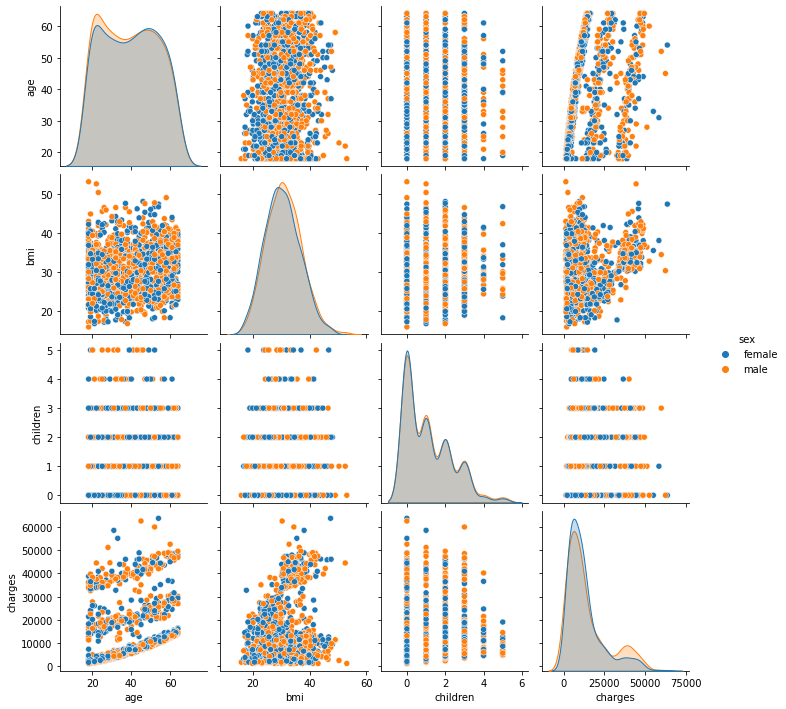

In [ ]:
# Pirplot of the data
sns.pairplot(df, hue='sex')

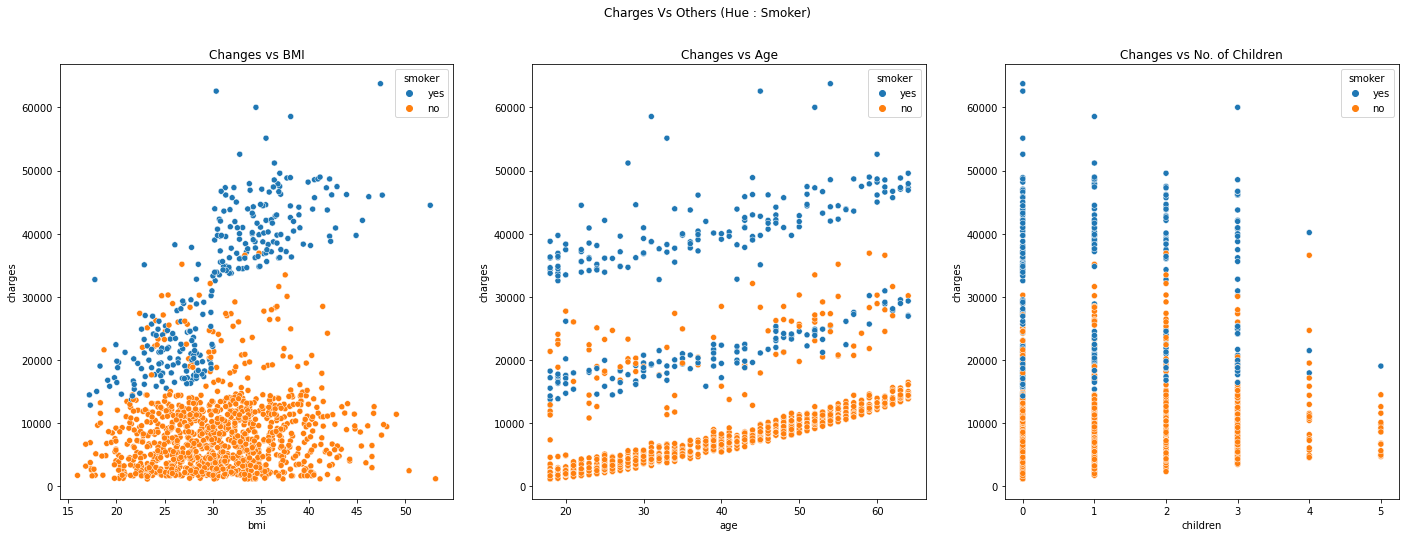

In [ ]:
# Scatter Plots Charges vs Others with Hue = Smoker
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,8))
fig.suptitle('Charges Vs Others (Hue : Smoker)')

ax1.set_title('Changes vs BMI')
sns.scatterplot(ax=ax1, data=df, x='bmi', y='charges', hue='smoker')


ax2.set_title('Changes vs Age')
sns.scatterplot(ax=ax2, data=df, x='age', y='charges', hue='smoker')

ax3.set_title('Changes vs No. of Children')
sns.scatterplot(ax=ax3, data=df, x='children', y='charges', hue='smoker')

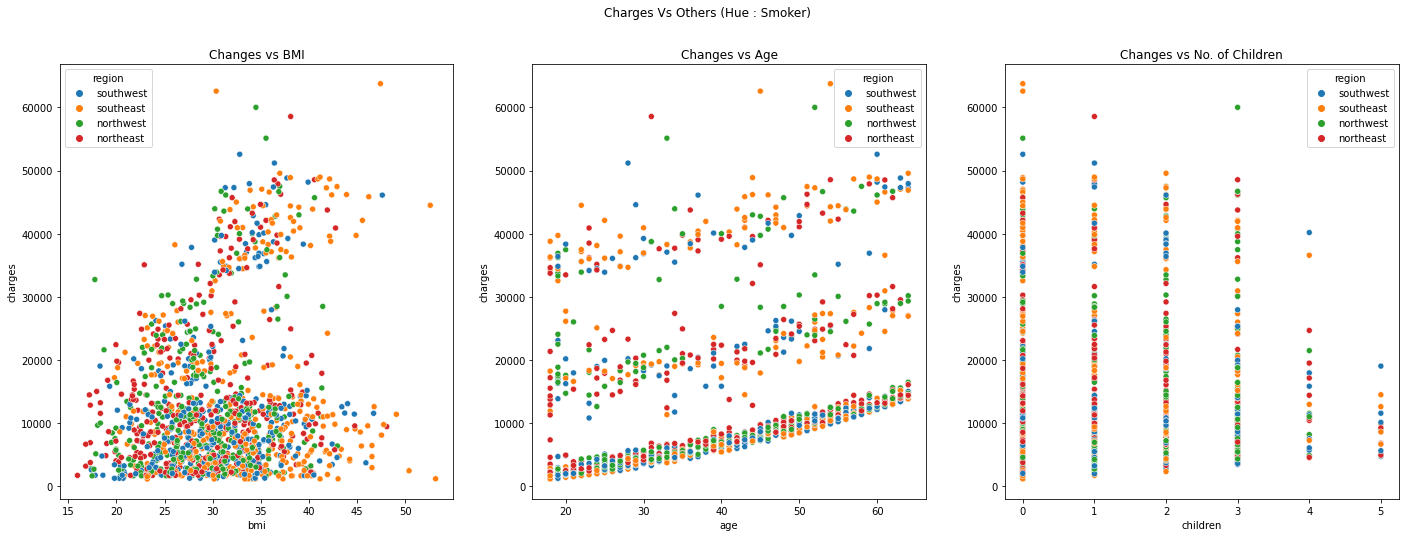

In [ ]:
# Scatter Plots Charges vs Others with Hue = Smoker
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,8))
fig.suptitle('Charges Vs Others (Hue : Smoker)')

ax1.set_title('Changes vs BMI')
sns.scatterplot(ax=ax1, data=df, x='bmi', y='charges', hue='region')


ax2.set_title('Changes vs Age')
sns.scatterplot(ax=ax2, data=df, x='age', y='charges', hue='region')

ax3.set_title('Changes vs No. of Children')
sns.scatterplot(ax=ax3, data=df, x='children', y='charges', hue='region')

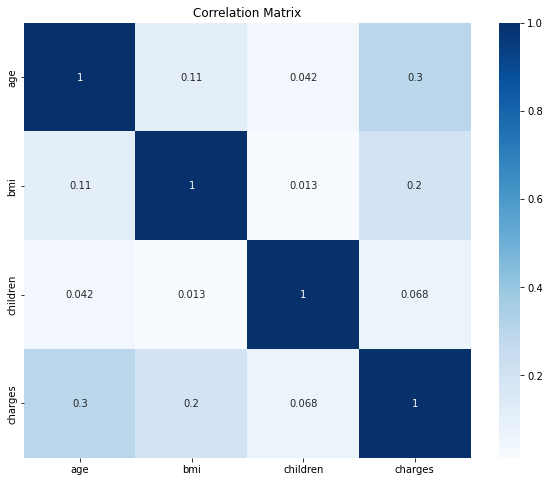

In [ ]:
# lets VISUALISE the corr between the various numerical features
corr = df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='Blues', annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
corr_target = abs(corr["charges"])
#Selecting highly correlated features
relevant_features = corr_target[corr_target >= 0.5]
relevant_features
# Sadly, we do not have any numerical features with a corr of 0.5 or more

charges    1.0
Name: charges, dtype: float64

## 4. Feature Engineering

In [ ]:
# before we do any kind of feature engineering, we will split the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression 

In [ ]:
trf1 = ColumnTransformer([
    ('ohe1', OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'), [1,4,5])
],remainder='passthrough')

trf2 = ColumnTransformer([
    ('scale', MinMaxScaler(), slice(0,7))
],remainder='passthrough')

trf3 = SelectKBest(score_func=f_regression, k='all')

trf4 = LinearRegression()

In [ ]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4)
])
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 4, 5])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 7, None))])),
                ('trf3',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x7f4b3cd3ddd0>)),
                ('trf4', LinearRegression())])

In [ ]:
#fit data
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 4, 5])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 7, None))])),
                ('trf3',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x7f4b3cd3ddd0>)),
                ('trf4', LinearRegression())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test,y_pred))
print('R2:', r2_score(y_test,y_pred))

MAE: 4167.437136542714
MSE: 37782862.43582198
R2: 0.7280568578646283
